In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Customer Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [16]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [23]:
df["customerID"].duplicated().sum()

np.int64(0)

In [24]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

#converted values 0/1 of senior citizen to yes/no to make it easier to understand

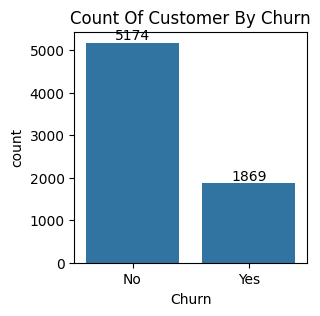

In [16]:
plt.figure(figsize=(3,3))
ax= sns.countplot(x='Churn', data = df)
plt.title('Count Of Customer By Churn')
ax.bar_label(ax.containers[0])
plt.show()

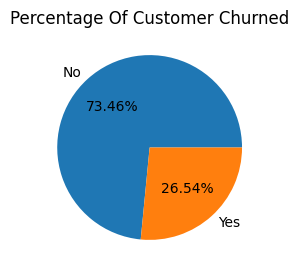

In [15]:
plt.figure(figsize=(3,3))
gb = df.groupby("Churn").agg({'Churn': 'count'})
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%')
plt.title('Percentage Of Customer Churned')
plt.show()

#from the given piechard we can conclude that 26.54% of our customerhave churned out now explore the reason ehind it

<function matplotlib.pyplot.show(close=None, block=None)>

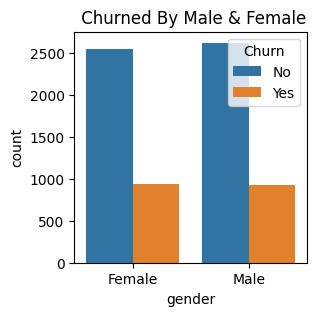

In [25]:
plt.figure(figsize=(3,3))
sns.countplot(x='gender', data = df , hue ='Churn')
plt.title(' Churned By Male & Female')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

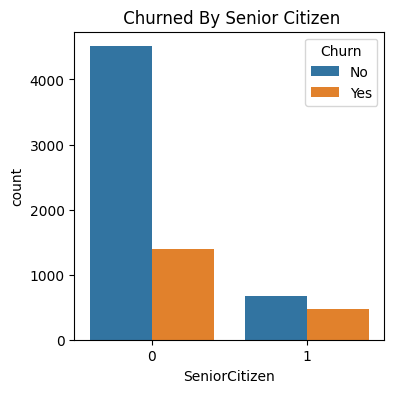

In [26]:
plt.figure(figsize=(4,4))
sns.countplot(x='SeniorCitizen', data = df , hue ='Churn')
plt.title(' Churned By Senior Citizen')
plt.show

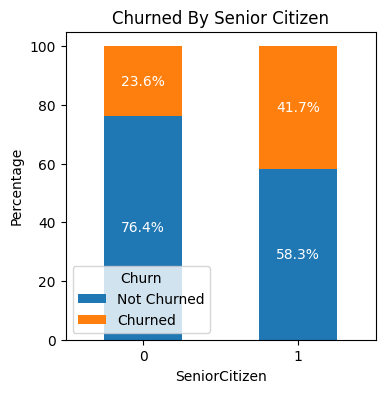

In [29]:
df_perc = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Define colors (Blue for 'Not Churned', Orange for 'Churned')
colors = ['#1f77b4', '#ff7f0e']

# Plot stacked bar chart with custom colors
ax = df_perc.plot(kind='bar', stacked=True, figsize=(4, 4), color=colors)

# Add percentage labels inside bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', fontsize=10, color='white')

# Formatting
plt.ylabel('Percentage')
plt.title('Churned By Senior Citizen')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.xticks(rotation=0)
plt.show()

#comapritively greater percentage in senior citizen has churned out

<function matplotlib.pyplot.show(close=None, block=None)>

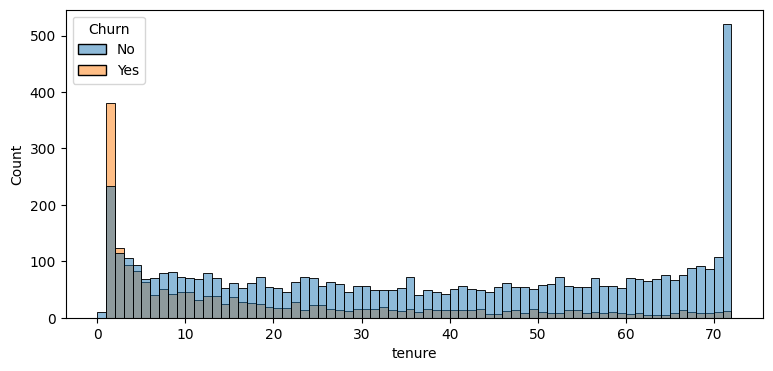

In [31]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure', data = df , hue = 'Churn', bins=72)
plt.show

#people who used our services for a long time has stayed and people who have used our services for 1 or 2 months have churned out

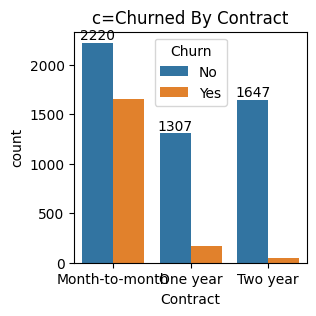

In [35]:
plt.figure(figsize=(3,3))
ax= sns.countplot(x='Contract', data = df, hue = 'Churn')
plt.title('c=Churned By Contract')
ax.bar_label(ax.containers[0])
plt.show()

#people who have month to month contract are likely to churn then from those who have one or two years of contreact

In [37]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

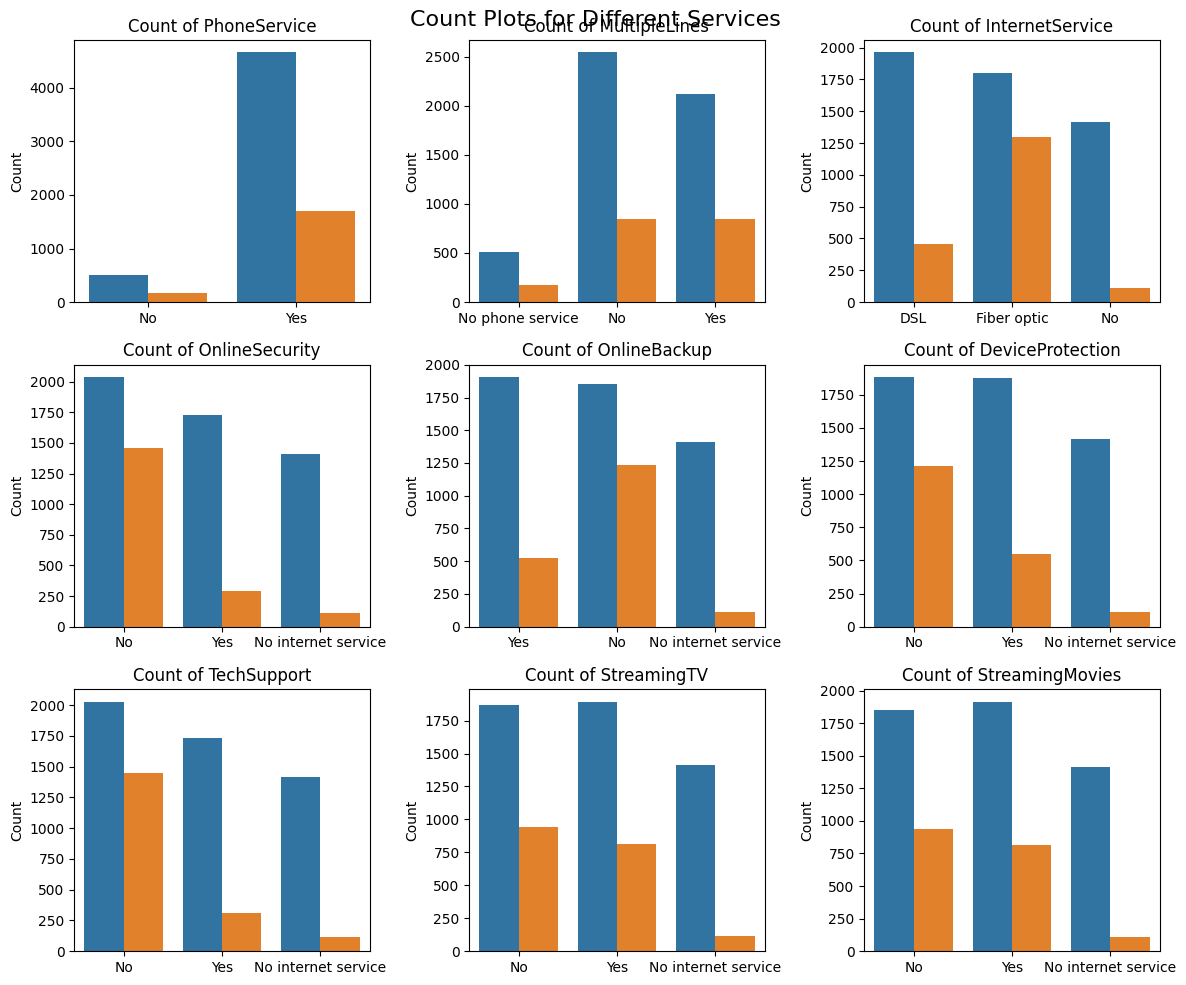

In [46]:
# Define columns for count plots
cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
fig.suptitle('Count Plots for Different Services', fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Define custom colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Get the number of unique values in 'Churn'
churn_unique_values = df['Churn'].nunique()

# Select only as many colors as needed (for binary 'Churn', use first two colors)
palette = custom_palette[:churn_unique_values]  

# Loop through columns and create count plots
for i, col in enumerate(cols):
    ax = axes[i]
    
    sns.countplot(x=col, data=df, hue='Churn', legend=False, palette=palette, ax=ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

#The count plots visualize the distribution of various telecom services used by customers, segmented by churn status.Key insights include a higher proportion of churn among fiber optic users, and lower churn rates for customers with security, backup, and tech support services. Additionally, customers without internet services have the lowest churn. These trends can help identify factors influencing customer retention.

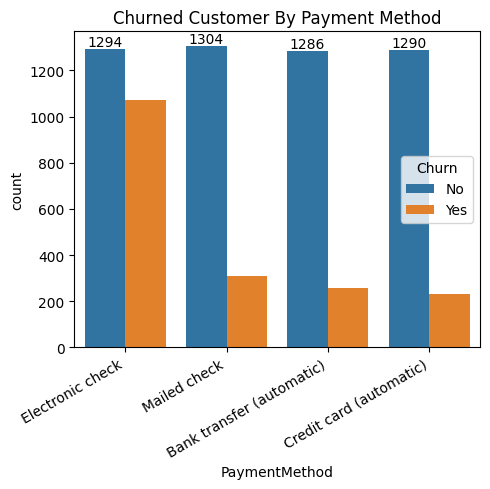

In [11]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x='PaymentMethod', data = df, hue= 'Churn')
plt.title('Churned Customer By Payment Method')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels by 30 degrees and align them to the right
plt.tight_layout()
plt.show()

#customer is likely to churn by electronic check method as compared to other three